<a href="https://colab.research.google.com/github/Fanevanjanahary/AI/blob/master/hotosm_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOTOSM workshop: Using machine learning to improve humanitarian action

### Jorge Martinez Gomez
### Felix Dellatre


 https://tinyurl.com/yynvb7xs

## 1. Basics

### Loading images

In [0]:
import cv2
import numpy as np
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from google.colab import drive
drive.mount('/content/drive')

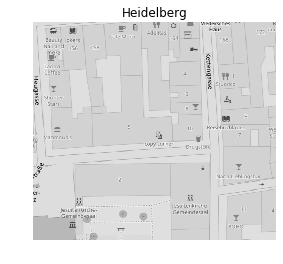

In [0]:
# Loading a grayscale image.
img = cv2.imread('map.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Heidelberg'); plt.axis('off');

In [0]:
print()

In [0]:
height, width = img.shape
print('The width of the image is:', width)
print('The height of the image is:', height)

The width of the image is: 865
The height of the image is: 470


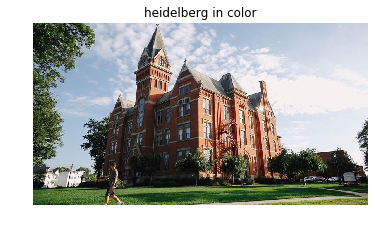

In [0]:
# Loading a color image
img = cv2.imread('heidelberg.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.title('heidelberg in color');

In [0]:
print(img.shape)

(470, 865, 3)


## 2. Image manipulation

### Image flipping

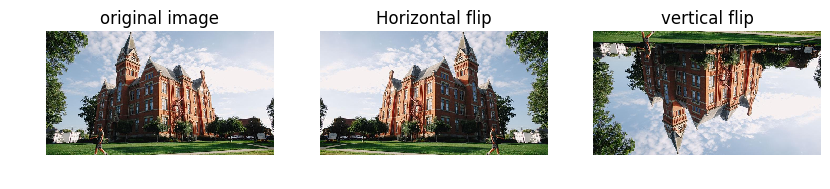

In [0]:
vertical_flip = cv2.flip(img, 1)

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img); plt.axis('off'); plt.title('original image');

horizontal_flip = cv2.flip(img, 1)
plt.subplot(1, 3, 2)
plt.imshow(horizontal_flip); plt.axis('off'); plt.title('Horizontal flip');

plt.subplot(1, 3, 3)
vertical_flip = cv2.flip(img, 0)
plt.imshow(vertical_flip); plt.axis('off'); plt.title('vertical flip');


### Negative of an image

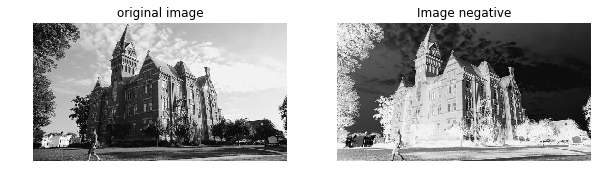

In [0]:
img = cv2.imread('heidelberg.jpg', cv2.IMREAD_GRAYSCALE)
img_neg = 255 - img

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('original image')
plt.subplot(1, 2, 2)
plt.imshow(img_neg, cmap='gray'); plt.title('Image negative'); plt.axis('off');

In [0]:
def img_power(img, gamma, c):
    out_img = c * np.power(img, gamma)

    plt.figure(figsize=(6, 6))
    plt.imshow(out_img, cmap='gray'); plt.axis('off')
    plt.title('Power transformation');plt.show()

gamma_slider = widgets.FloatSlider(min=0.1, max=2.0, value=0.5, step=0.1, description='gamma')
interact(img_power, img=fixed(img), gamma=gamma_slider, c=fixed(1));

interactive(children=(FloatSlider(value=0.5, description='gamma', max=2.0, min=0.1), Output()), _dom_classes=(…

### Image thresholding

In [0]:
def img_thresh(img, threshold):
    _, out_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(out_img, cmap='gray')
    plt.title('Thresholding image'); plt.axis('off'); plt.show()

threshold_slider = widgets.IntSlider(min=0, max=255, value=128, step=20, description='threshold')
interact(img_thresh, img=fixed(img), threshold=threshold_slider);

interactive(children=(IntSlider(value=128, description='threshold', max=255, step=20), Output()), _dom_classes…

## 3. Spatial operations

### Image convolutions

In [0]:
def filter_img(img, k_size):
    kernel = np.ones((k_size, k_size)) * 1 / (k_size ** 2)
    img_out = cv2.filter2D(img, -1, kernel)
    plt.figure(figsize=(7, 7))
    plt.imshow(img_out, cmap='gray'); plt.axis('off')
    plt.title('Smoothed image using kernel with size {0}'.format(k_size))

filter_slider = widgets.IntSlider(min=1, max=11, value=1, step=2, description='kernel size')
interact(filter_img, img=fixed(img), k_size=filter_slider);

interactive(children=(IntSlider(value=1, description='kernel size', max=11, min=1, step=2), Output()), _dom_cl…

### Noise removal

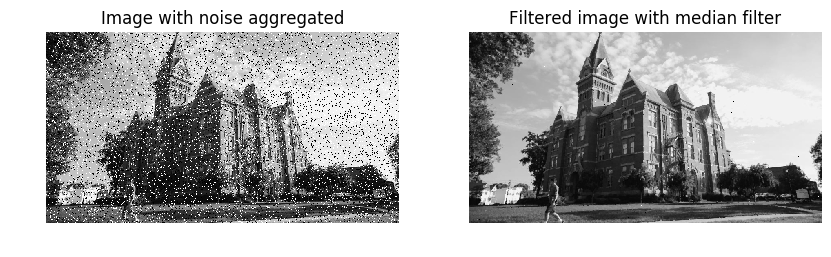

In [0]:
threshold_value = 0.07
noisy_image = img.copy()
random_image = np.random.random(size=img.shape)

# Replacing values.
noisy_image[np.where(random_image < threshold_value)] = 0
noisy_image[np.where(random_image > 1 - threshold_value)] = 255

# Applying median filter.
filtered_img = cv2.medianBlur(noisy_image, 3)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray'); plt.title('Image with noise aggregated'); plt.axis('off');
plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray'); plt.title('Filtered image with median filter'); plt.axis('off');

## 4. Feature extraction

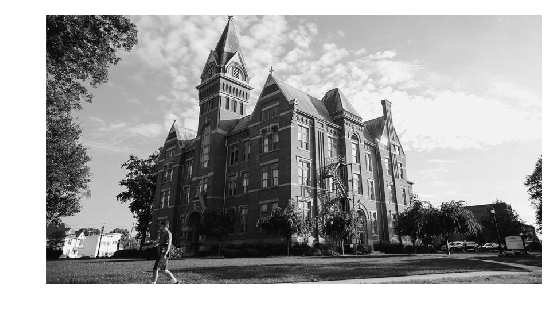

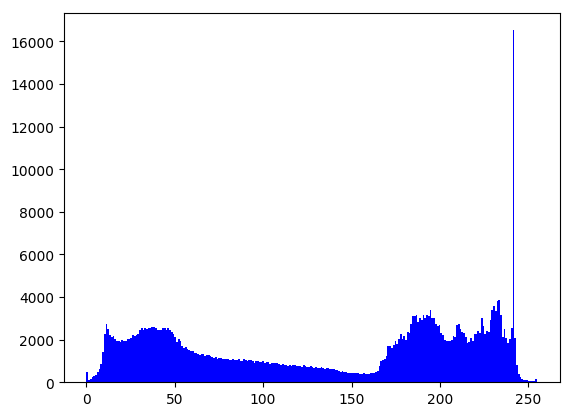

In [0]:
img = cv2.imread('heidelberg.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray'); plt.axis('off');
plt.figure()
plt.hist(img.ravel(), 256, color = 'b');

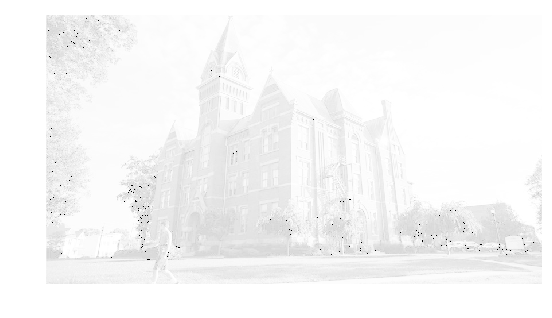

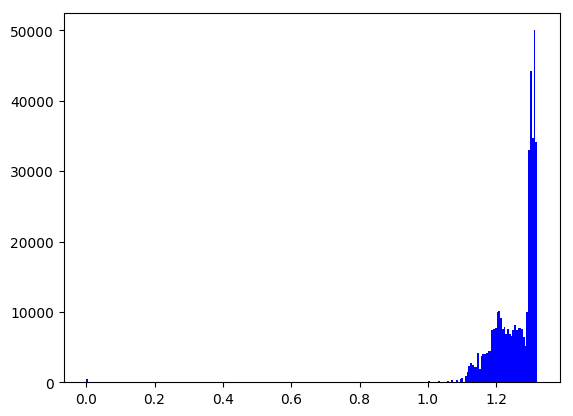

In [0]:
img_out = np.power(img, 0.05)
plt.imshow(img_out, cmap='gray'); plt.axis('off');
plt.figure();
plt.hist(img_out.ravel(), 256, color = 'b');


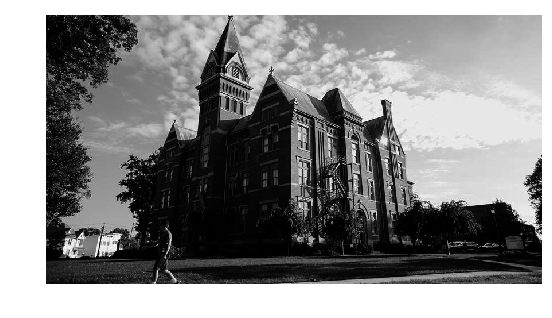

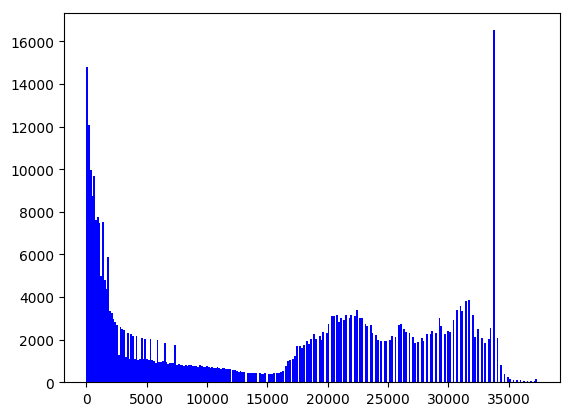

In [0]:
img_out = np.power(img, 1.9)
plt.imshow(img_out, cmap='gray'); plt.axis('off');
plt.figure()
plt.hist(img_out.ravel(), 256, color = 'b');

### Template match

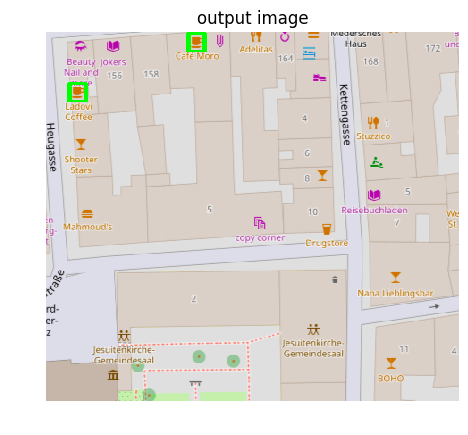

In [0]:
img = cv2.imread('map.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

template = cv2.imread('template_2.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
height, width, _ = template.shape

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
locations = np.where(res >= 0.8)
for point in zip(locations[1], locations[0]):
    cv2.rectangle(img, point, (point[0] + width, point[1] + height), (0, 255, 0), 2)
    
plt.imshow(img); plt.axis('off'); plt.title('output image');

## Classification

In [0]:
def create_color_histogram(img):
  return cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8],
                      [0, 256, 0, 256, 0, 256]).flatten().tolist()


folder_name = 'dataset'
if not os.path.isdir(folder_name):
  os.mkdir(folder_name)

In [0]:
files = os.listdir(folder_name)
files.sort()

# Read all images.
images = [cv2.imread(os.path.join(folder_name, i)) for i in files]
labels = ['desert' if i.startswith('desert') else 'forest' for i in files]

# Resize all images.
images = [cv2.resize(i, (150, 150)) for i in images]


In [0]:
hists = [create_color_histogram(i) for i in images]

In [0]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
classifier.fit(hists, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
classifier.predict([create_color_histogram(images[0])])

array(['desert'], dtype='<U6')

### Verify with unseen data

In [0]:
test_img = cv2.imread('test_desert.jpeg')
test_img = cv2.resize(test_img, (150, 150))
input_img = create_color_histogram(test_img)
print(classifier.predict([input_img]))

['desert']
